In [53]:
import pandas as pd
Orig = pd.read_csv('train_test.csv')

In [54]:
training = Orig[Orig['country_destination'].notnull()]

In [55]:
del training['Unnamed: 0']

In [56]:
del training['id']

In [57]:
training = training.fillna(-1)

In [58]:
training_Y = training.loc[:,'country_destination']

In [59]:
training_X = training.drop(['country_destination'], axis=1)

In [60]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier


# fit an Extra Trees model to the data
model = ExtraTreesClassifier(class_weight = 'balanced')
model.fit(training_X, training_Y)

ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

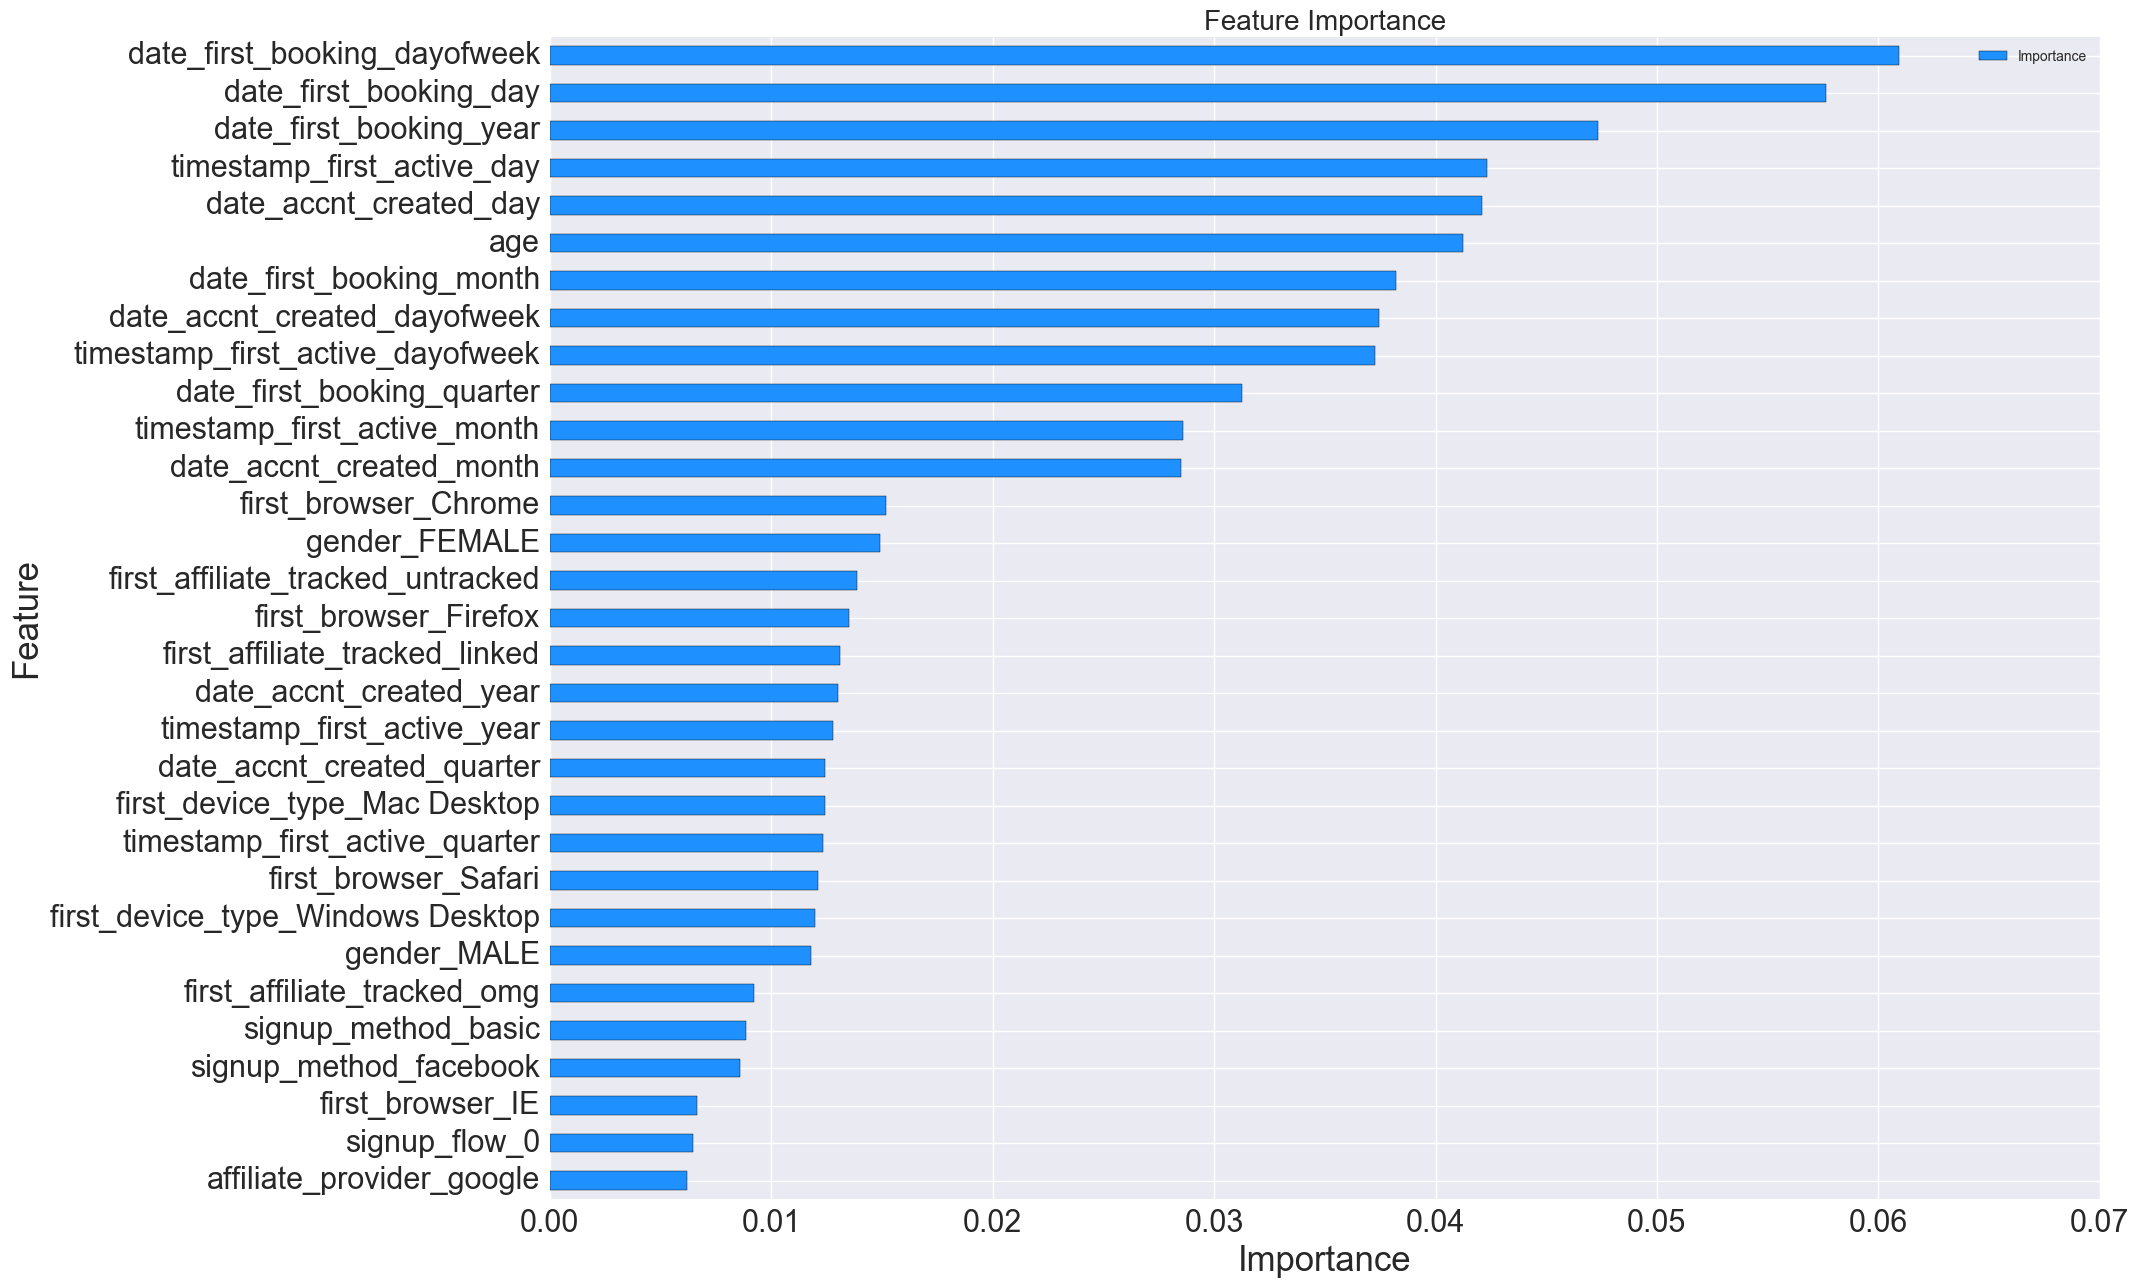

In [61]:
d3 = {'Feature':list(training_X),'Importance': list(model.feature_importances_)}
d4 = pd.DataFrame(d3,index = list(training_X))
import seaborn as sn
import matplotlib.pyplot as plt
d4 = d4.sort_values("Importance", ascending=False)
d4[30::-1].plot(fontsize=22,kind = 'barh',color = 'dodgerblue',figsize=(20,15))
plt.title('Feature Importance',fontsize= 20)
plt.xlabel('Importance', fontsize=25)
plt.ylabel('Feature', fontsize=25)
plt.show()

In [62]:
d4.head()

,Feature,Importance
date_first_booking_dayofweek,date_first_booking_dayofweek,0.060949
date_first_booking_day,date_first_booking_day,0.057625
date_first_booking_year,date_first_booking_year,0.047328
timestamp_first_active_day,timestamp_first_active_day,0.042330
date_accnt_created_day,date_accnt_created_day,0.042121


In [63]:
GoodFeature=d4[d4.Importance>0].index.tolist()

# Test Set

In [64]:
test = Orig[Orig['country_destination'].isnull()]

In [65]:
del test['Unnamed: 0']

In [66]:
ID = test['id']

In [67]:
ID.index = np.arange(0, len(ID))

In [68]:
test = test.fillna(-1)

In [69]:
del test['id']

In [70]:
del test['country_destination']

In [71]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_label = label_encoder.fit_transform(training_Y)

# Random Forest

In [74]:
import numpy as np
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier(min_samples_leaf =4,class_weight = 'balanced', random_state = 15)
np.random.seed(1)
randomForest.fit(training_X[GoodFeature], training_Y) # fit 
randomForest.score(training_X[GoodFeature], training_Y)

0.80183273912982367

In [75]:
pred = randomForest.predict_proba(test[GoodFeature])

In [76]:
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(ID)):
    idx = ID[i]
    ids += [idx] * 5
    cts += label_encoder.inverse_transform(np.argsort(pred[i])[::-1])[:5].tolist()

In [77]:
rf_model1 = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])

In [78]:
rf_model1.to_csv('rf2.csv')

# Adaboost

In [97]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=25, learning_rate=.8,random_state = 20)
ada = ada.fit(training_X[GoodFeature], training_Y)
ada.score(training_X[GoodFeature], training_Y)

0.87569980932391978

In [98]:
pred1 = ada.predict_proba(test[GoodFeature])

In [99]:
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(ID)):
    idx = ID[i]
    ids += [idx] * 5
    cts += label_encoder.inverse_transform(np.argsort(pred[i])[::-1])[:5].tolist()

In [100]:
ada1 = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])

In [101]:
ada1.to_csv('ada2.csv')

# Logistic

In [96]:
from sklearn import linear_model
logit_1 = linear_model.LogisticRegression()
logit_1.set_params(C=1e4,class_weight='balanced')
logit_1.fit(training_X[GoodFeature], training_Y)
logit_1.score(training_X[GoodFeature], training_Y)

0.57772509850035836

In [ ]:
def 